# WoW Churn Analysis and Prediction

In this project, my objective was to analyze the key factors that contribute to player churn in the game World of Warcraft (WoW) and develop a machine learning model to predict future churn based on these insights. By examining various in-game behaviors, engagement patterns, and external factors, I aimed to identify the most significant reasons why players stop playing. The ultimate goal was to leverage these findings to build a predictive model that can help game developers and analysts take proactive measures to improve player retention and enhance overall user experience.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [5]:
df = pd.read_csv('/content/churn.csv')

# EDA

In this process, I needed to conduct a thorough exploration of the dataset to ensure its quality and reliability before proceeding with model development. This involved identifying and handling outliers that could skew the analysis, detecting and removing duplicate entries to prevent redundancy, and examining the data types of each column to ensure proper formatting and compatibility for further processing. By performing these initial steps, I aimed to create a clean and well-structured dataset that would serve as a solid foundation for meaningful analysis and accurate predictions.

In [6]:
df.head(10) #Chechking dataset to understand dataset.

,Unnamed: 0,char_id,guild,total_timestamps,unique_days,max_level,min_month,max_month,Average_Hour,Average_Playing_density,Playing_after_6_months
0,0,2,1,1,1,18,12,12,0.167,0.033,0
1,1,7,1,655,50,71,1,12,2.183,0.137,1
2,2,9,1,2739,133,70,1,6,3.432,0.727,1
3,3,10,0,674,49,61,7,11,2.293,0.321,0
4,4,19,1,3001,149,70,1,12,3.357,0.407,1
5,5,21,1,1513,197,70,1,12,1.280,0.538,1
6,6,22,1,62,13,63,1,12,0.795,0.036,1
7,7,23,1,2140,126,71,1,12,2.831,0.344,1
8,8,26,1,7,4,61,2,11,0.292,0.013,1
9,9,27,1,310,8,65,6,7,6.458,0.131,0


In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,37354.000,18676.500,10783.315,0.000,9338.250,18676.500,28014.750,37353.000
char_id,37354.000,63453.952,24402.572,2.000,52801.250,71877.500,81223.750,90580.000
guild,37354.000,0.323,0.468,0.000,0.000,0.000,1.000,1.000
total_timestamps,37354.000,289.841,957.007,1.000,2.000,6.000,59.000,42801.000
unique_days,37354.000,18.511,44.083,1.000,1.000,2.000,10.000,352.000
max_level,37354.000,20.474,26.133,1.000,1.000,6.000,32.000,80.000
min_month,37354.000,6.077,4.030,1.000,2.000,6.000,10.000,12.000
max_month,37354.000,8.355,3.525,1.000,6.000,10.000,11.000,12.000
Average_Hour,37354.000,1.064,1.341,0.167,0.167,0.500,1.417,20.266
Average_Playing_density,37354.000,0.110,0.153,0.005,0.033,0.033,0.098,0.984


Based on the observations from this table, we can conclude that there is a significant variation in the values of the total_timestamps column. This high level of variability suggests the presence of extreme values or outliers that could negatively impact the accuracy and reliability of our analysis. To ensure a more balanced and representative dataset, it is essential to apply appropriate outlier detection and suppression techniques. By handling these anomalies effectively, we can improve the quality of our data and enhance the performance of our predictive models.

In [ ]:
df.info() #some values like 'guild' can be changen into categorical value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37354 entries, 0 to 37353
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               37354 non-null  int64  
 1   char_id                  37354 non-null  int64  
 2   guild                    37354 non-null  int64  
 3   total_timestamps         37354 non-null  int64  
 4   unique_days              37354 non-null  int64  
 5   max_level                37354 non-null  int64  
 6   min_month                37354 non-null  int64  
 7   max_month                37354 non-null  int64  
 8   Average_Hour             37354 non-null  float64
 9   Average_Playing_density  37354 non-null  float64
 10  Playing_after_6_months   37354 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 3.1 MB


In [ ]:
df.shape

(37354, 11)

In [ ]:
df.isna().sum() #There is no null value

,0
Unnamed: 0,0
char_id,0
guild,0
total_timestamps,0
unique_days,0
max_level,0
min_month,0
max_month,0
Average_Hour,0
Average_Playing_density,0


In [ ]:
df.duplicated().values.any() #There is no Dublicated values

False

# What is the meaning of these column names?

After thoroughly checking the dataset for inconsistencies and ensuring data quality, I conducted a detailed analysis of each column to understand its significance, distribution, and potential impact on player churn. This involved examining column names, data types, unique values, and their relationships with other features. Based on this comprehensive review, I created a structured data dictionary, which serves as a reference document outlining the meaning, type, and description of each variable. This step was crucial for maintaining clarity, facilitating better data interpretation, and ensuring consistency throughout the projec

Unnamed 0 : Table ID

Char id : User ID

guild : if user joined any group then its 1 else 0

total_time_stamps : Total Game Sessions

unique_days : It shows how many days users play game without considering sessions

max_level : Users max reached level

min_month : Users min month

max_month : Users max month

Average_Hour: Users' average hour playing game

Average_playing_density: user' playing density

Playing_after_6_months: if user still play after 6 monthsthen 1 else 0


In [ ]:
guild = df['guild'].value_counts().reset_index()
guild

,guild,count
0,0,25284
1,1,12070


<Axes: xlabel='guild', ylabel='count'>

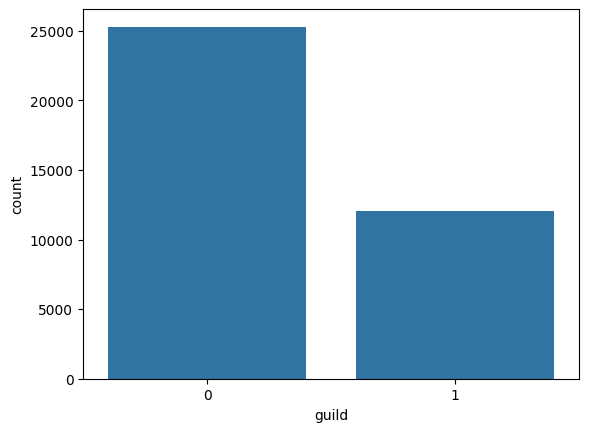

In [ ]:
sns.barplot(data=guild, x='guild', y='count')

The dataset exhibits a slight imbalance in terms of guild distribution, meaning that some guilds have significantly more players than others. While this imbalance is not extreme, it may still impact certain analyses or predictive models, particularly if guild membership plays a crucial role in player behavior. Addressing this imbalance through techniques such as resampling or weighting may help ensure more reliable and unbiased insights.

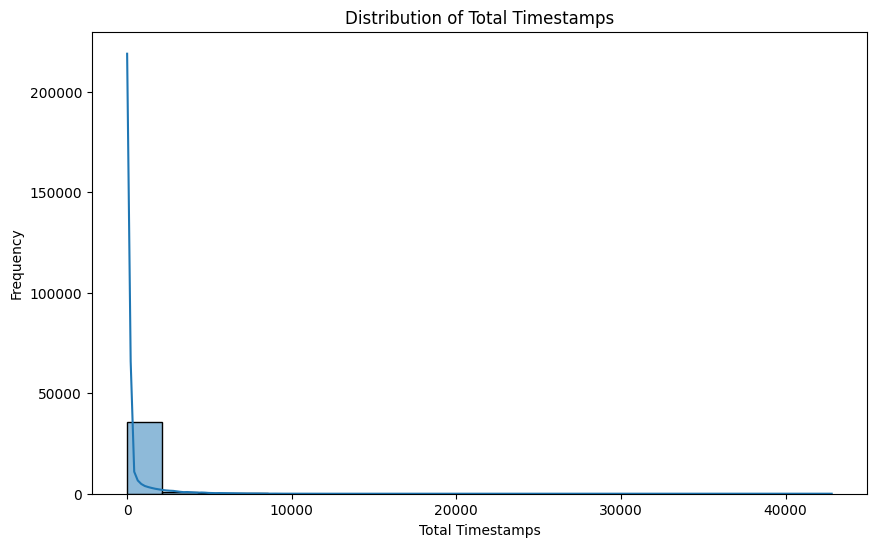

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_timestamps'], bins=20, kde=True)
plt.xlabel('Total Timestamps')
plt.ylabel('Frequency')
plt.title('Distribution of Total Timestamps')
plt.show()

<Axes: xlabel='total_timestamps'>

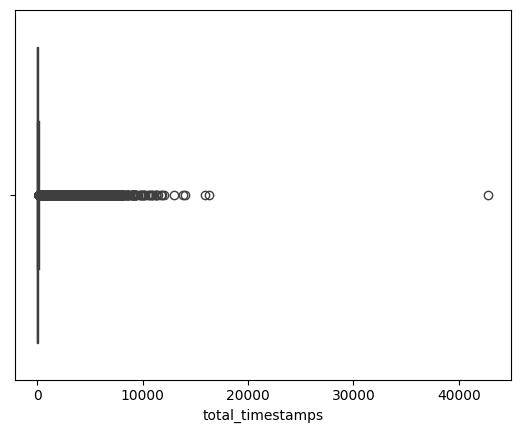

In [ ]:
sns.boxplot(x=df['total_timestamps'])

The **total_timestamps** column contains a significant number of outliers, which could potentially introduce bias and negatively affect the performance of our machine learning model. These extreme values may distort statistical summaries, influence model predictions, and lead to inaccurate generalizations. To mitigate these issues, it is essential to apply appropriate outlier detection and handling techniques, such as transformation, trimming, or robust scaling, to ensure a more reliable and well-balanced dataset for model training and evaluation.

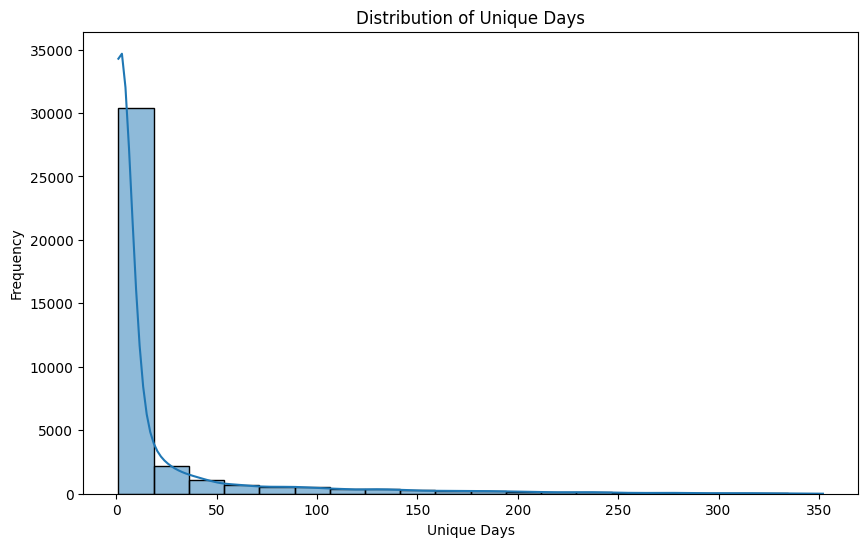

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['unique_days'], bins=20, kde=True)
plt.xlabel('Unique Days')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Days')
plt.show()

<Axes: xlabel='unique_days'>

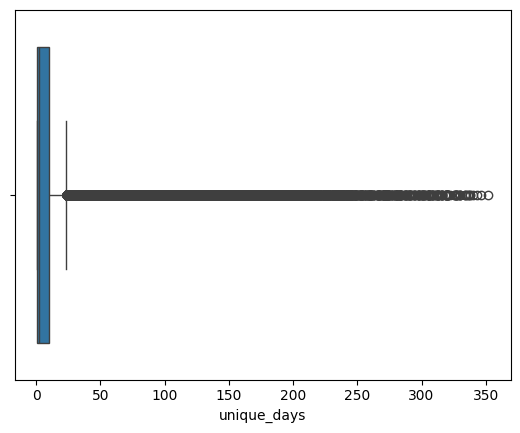

In [ ]:
sns.boxplot(x=df['unique_days'])

The majority of the data points fall within the range of 0 to 150 unique days, indicating that most players are active within this timeframe. This distribution suggests that while some players may have significantly longer engagement periods, the core player base tends to remain within this range. Understanding this pattern is crucial for analyzing player retention, engagement trends, and potential churn behavior, as well as for making informed decisions when preprocessing the data for machine learning models.

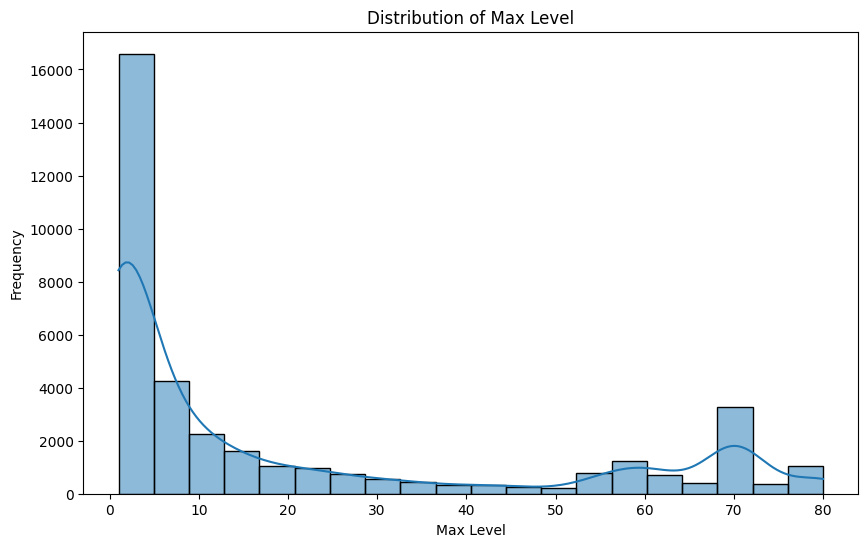

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['max_level'], bins=20, kde=True)
plt.xlabel('Max Level')
plt.ylabel('Frequency')
plt.title('Distribution of Max Level')
plt.show()

<Axes: xlabel='max_level'>

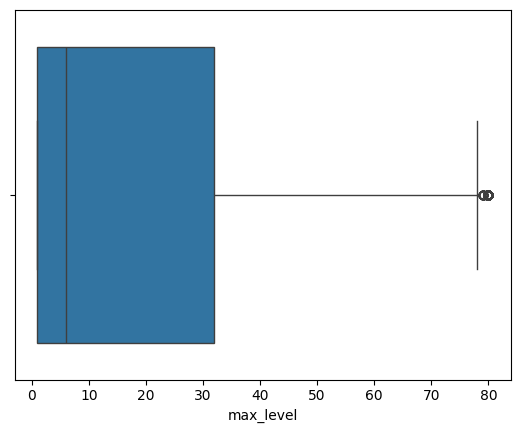

In [ ]:
sns.boxplot(x=df['max_level'])

The max_level column contains relatively fewer outliers, with most players reaching levels between 0 and 40. This suggests that a significant portion of gamers may struggle to progress beyond the early stages of the game. Possible reasons for this could include challenges in mastering game mechanics, difficulties with the user interface (UI), or a lack of engagement with the game type. Identifying these factors can provide valuable insights for improving player onboarding, game design, and overall user experience to enhance retention and progression rates.

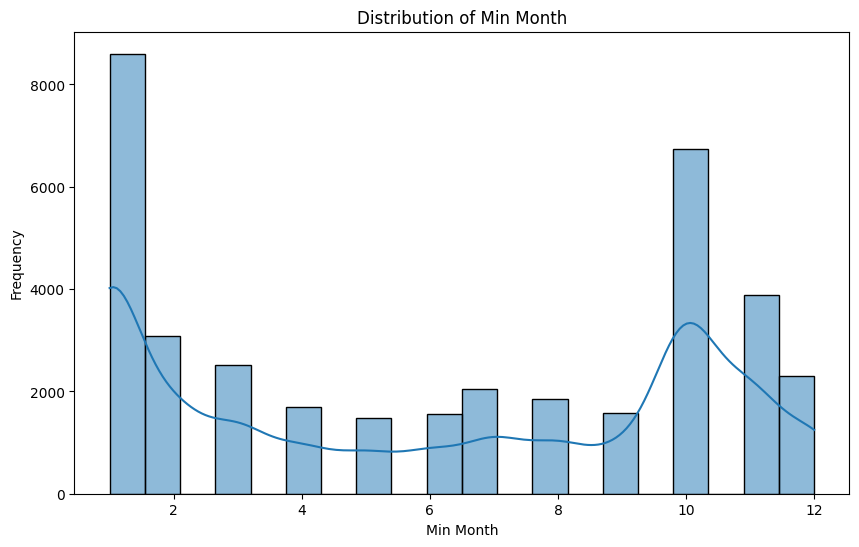

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['min_month'], bins=20, kde=True)
plt.xlabel('Min Month')
plt.ylabel('Frequency')
plt.title('Distribution of Min Month')
plt.show()

<Axes: ylabel='min_month'>

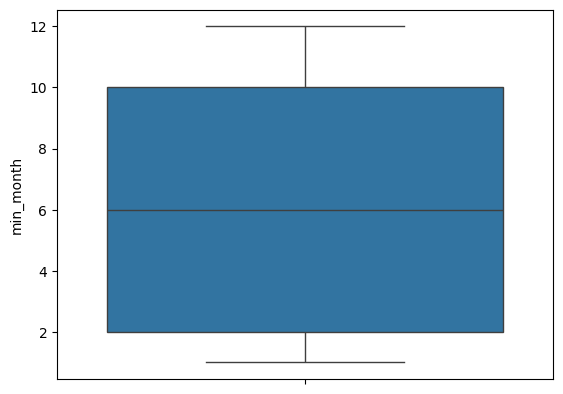

In [ ]:
sns.boxplot(df['min_month'])

The boxplot analysis indicates that there are no significant outliers present in the dataset.Because of the values it can not be observed in boxplot. However, when examining the max_month variable, we observe a lack of consistency in its distribution. The histogram reveals two distinct peak points, suggesting a bimodal pattern. This indicates that player activity is not evenly distributed over time, and there may be underlying factors, such as seasonal trends, game updates, or specific in-game events, influencing player engagement at different periods.

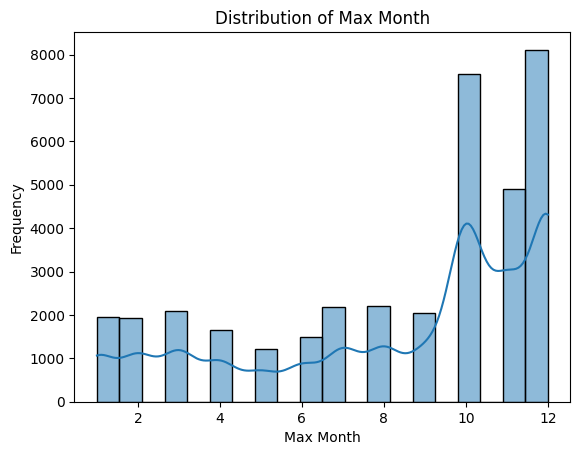

In [ ]:
sns.histplot(df['max_month'], bins=20, kde=True)
plt.xlabel('Max Month')
plt.ylabel('Frequency')
plt.title('Distribution of Max Month')
plt.show()

The histogram shows a left-skewed (negatively skewed) distribution, indicating that the majority of players have a high maximum playing duration, with many remaining active for almost a year. This suggests that while some players may churn early, a significant portion of the player base remains engaged for an extended period. Such a distribution could be influenced by factors like game content updates, long-term progression systems, or strong community engagement.

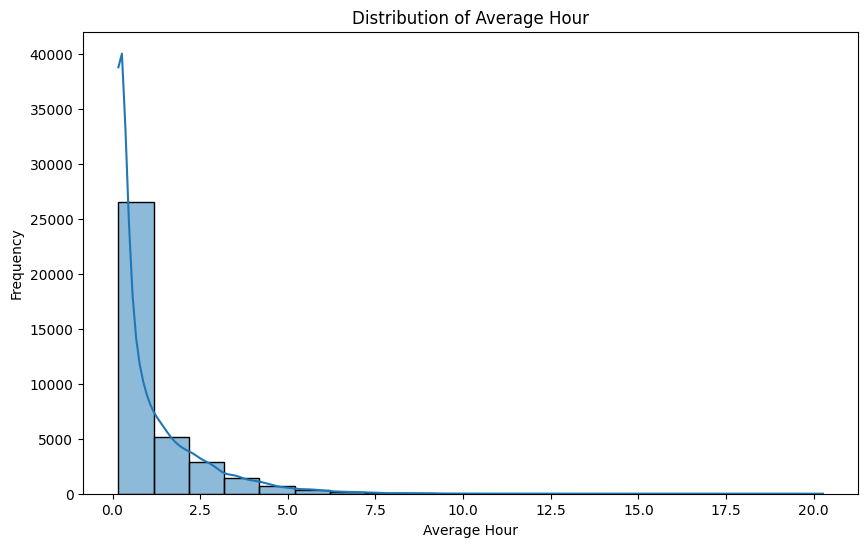

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Average_Hour'], bins=20, kde=True)
plt.xlabel('Average Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Average Hour')
plt.show()

<Axes: xlabel='Average_Hour'>

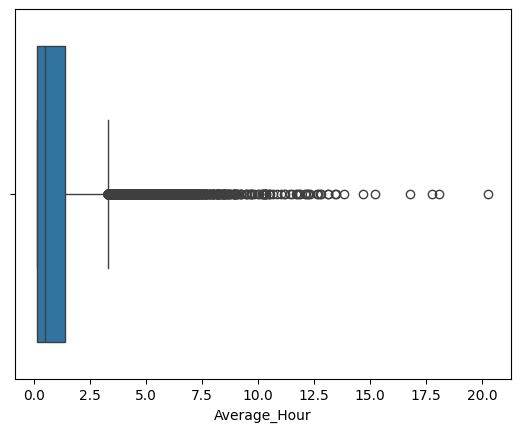

In [ ]:
sns.boxplot(x=df['Average_Hour'])

In [ ]:
df['Average_Hour'].describe()

,Average_Hour
count,37354.000
mean,1.064
std,1.341
min,0.167
25%,0.167
50%,0.500
75%,1.417
max,20.266


The distribution of average hours played by gamers primarily falls between 0 and 7.5 hours, indicating that most players tend to engage with the game for relatively short durations on average. However, the data also contains a significant number of outliers, which suggests that there are a few players who either play for much longer periods or exhibit unusual patterns of behavior. These outliers may represent highly engaged players or players who have sporadic gaming sessions.

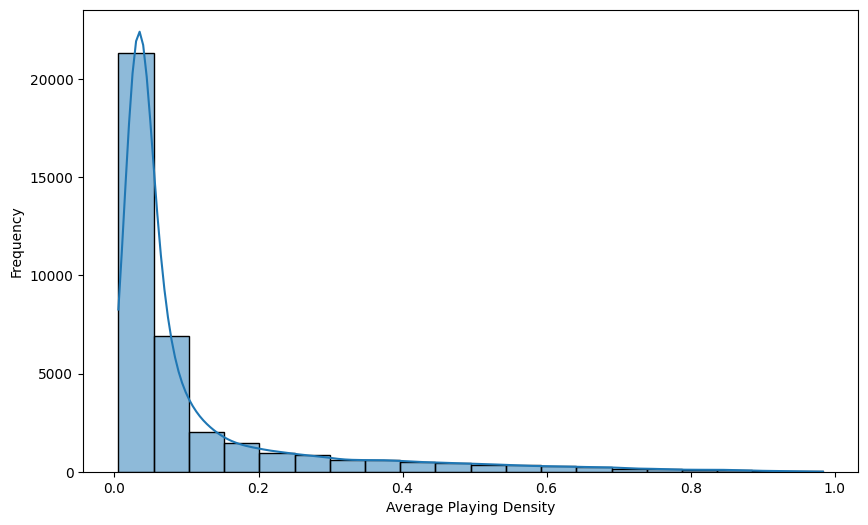

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Average_Playing_density'], bins=20, kde=True)
plt.xlabel('Average Playing Density')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Average_Playing_density'>

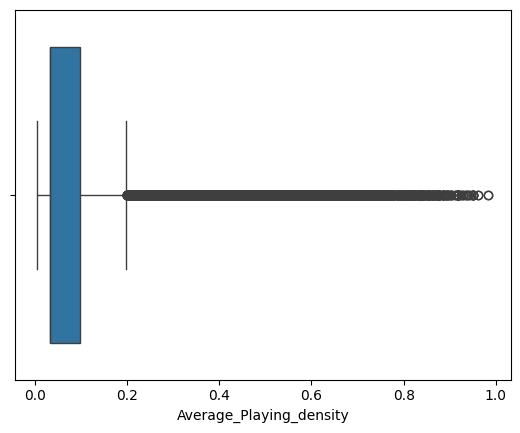

In [ ]:
sns.boxplot(x=df['Average_Playing_density'])

The player density primarily falls between 0 and 0.2, indicating that most players in the dataset have lower engagement levels, with a significant portion of the player base playing for only brief periods. This suggests that a large number of gamers may be less engaged or play sporadically. Additionally, the boxplot reveals the presence of many outliers, further emphasizing that there are a few players who exhibit unusually high engagement levels compared to the majority. These outliers may represent highly active players or those with irregular, intense bursts of activity.

# Cross Relations with Variables


## Inconstincy in Data

Upon reviewing the data table, I noticed that for some players, the minimum and maximum months are identical, indicating that their gaming activity is limited to a single month. This suggests that while some players have a distinct interval of playtime (i.e., they engage with the game over a longer period), others may only play during a brief, isolated period without a consistent interval of activity. This difference in behavior could reflect varying levels of engagement, ranging from casual players to more dedicated ones. Identifying these patterns may provide valuable insights for improving player retention strategies and tailoring content to different player segments.Thats why, i create a new variable based on interval.

<Axes: >

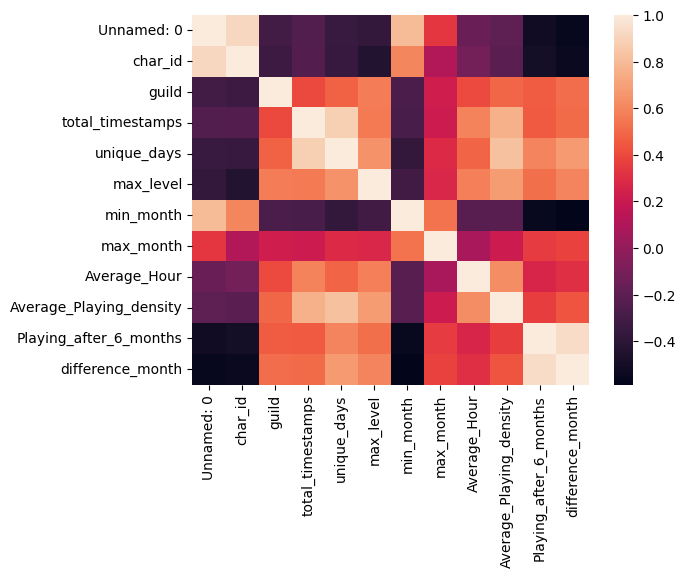

In [ ]:
sns.heatmap(data=df.corr())

Upon analyzing the churn , I observed a negative high correlation between **min_months** and high positive correlation between several key variables: **max_level**, **unique_days**, **total_timestamps**, and **guild**. This indicates that as these factors increase, the likelihood of player churn also increases. For example, players with higher maximum levels, more unique days of play, or longer total gameplay durations may exhibit specific patterns of behavior that correlate with higher churn rates. Additionally, the guild variable plays a significant role, suggesting that certain guild dynamics or membership may influence player retention. Understanding these relationships is crucial for identifying at-risk players and developing strategies to reduce churn.

In [ ]:
df.groupby('Playing_after_6_months').agg({'guild':'count','max_level':['mean','max','min','std'],'unique_days':['mean','max','min','std'],'total_timestamps':['mean','max','min','std'],'difference_month':['mean','max','min','std']})

guild max_level                unique_days                 total_timestamps                     difference_month              
                        count      mean max min    std        mean  max min    std             mean    max min      std             mean max min   std
Playing_after_6_months                                                                                                                                
0                       29149    13.229  80   1 20.318       4.614  128   1 10.075           61.531   5676   1  254.843            0.446   4   0 0.953
1                        8205    46.216  80   1 28.170      67.878  352   2 73.239         1100.934  42801   2 1759.558            8.786  11   5 2.101

In [7]:
churners = df[df['Playing_after_6_months']==0]
churners[ (churners['total_timestamps']<=128)]['total_timestamps'].describe()

,total_timestamps
count,26741.000
mean,11.505
std,21.187
min,1.000
25%,1.000
50%,3.000
75%,10.000
max,128.000


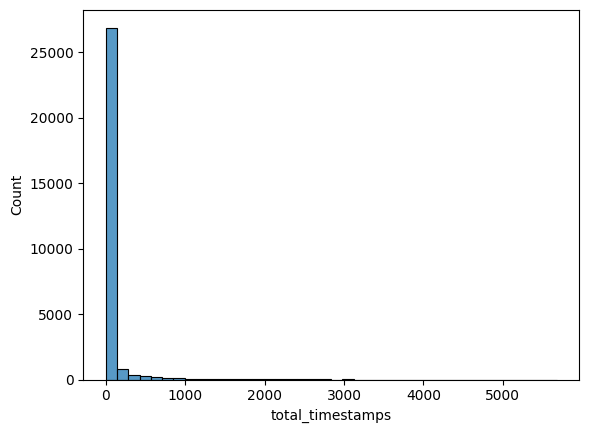

In [ ]:
sns.histplot(data=churners, x='total_timestamps',bins=40)
plt.show()

In [ ]:
churners[churners['total_timestamps'] <43].shape[0] # I take 2 standart deviation

24643

In [9]:
churners['total_timestamps'].describe()

,total_timestamps
count,29149.000
mean,61.531
std,254.843
min,1.000
25%,1.000
50%,3.000
75%,16.000
max,5676.000


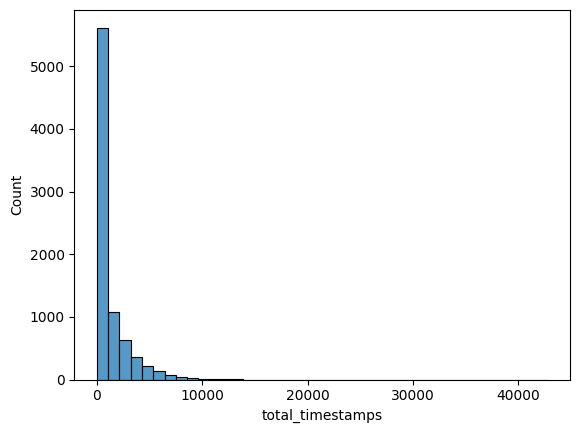

In [ ]:
sns.histplot(data=df[df['Playing_after_6_months']==1], x='total_timestamps',bins=40)
plt.show()

In [ ]:
df.loc[df['Playing_after_6_months']==1,'total_timestamps'].describe()

,total_timestamps
count,8205.000
mean,1100.934
std,1759.558
min,2.000
25%,32.000
50%,268.000
75%,1534.000
max,42801.000


In [ ]:
df[(df['Playing_after_6_months']==1) & (df['total_timestamps']>128)].shape[0]

4851

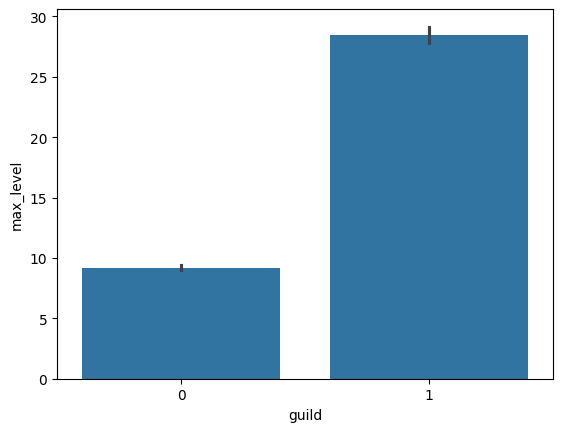

In [ ]:

sns.barplot(data=churners, x='guild', y='max_level')
plt.show()

In [ ]:
df.groupby(['Playing_after_6_months','guild']).agg({'guild':'count'})

guild
Playing_after_6_months guild       
0                      0      23052
                       1       6097
1                      0       2232
                       1       5973

The data indicates that **79% of churned players** are not part of a guild, suggesting that guild membership plays a crucial role in player retention. Being part of a guild may provide social interaction, cooperative gameplay, and a sense of belonging, all of which can contribute to prolonged engagement with the game. In contrast, players who do not join a guild may feel less connected to the game community, leading to a higher likelihood of churn. This insight highlights the importance of encouraging guild participation as a potential strategy to improve player retention and engagement.

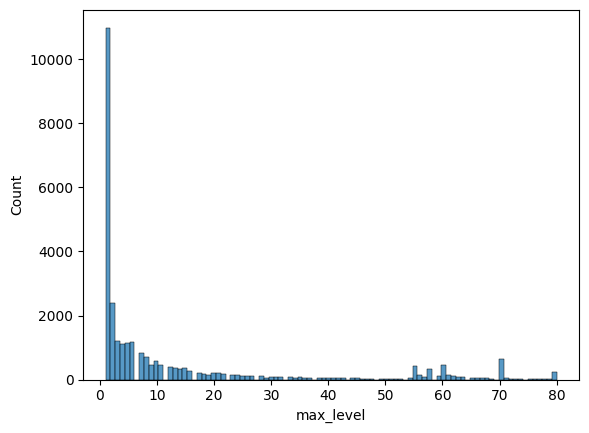

In [ ]:
sns.histplot(data=churners, x='max_level')
plt.show()

In [ ]:
churners['max_level'].describe()

,max_level
count,29149.000
mean,13.229
std,20.318
min,1.000
25%,1.000
50%,3.000
75%,14.000
max,80.000


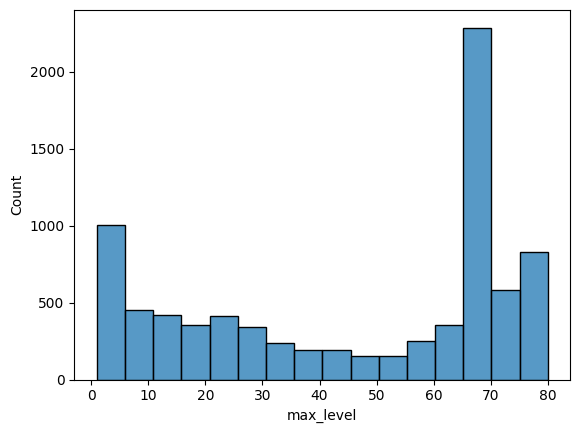

In [ ]:
sns.histplot(data=df[df['Playing_after_6_months']==1], x='max_level')
plt.show()

In [ ]:
df.loc[df['Playing_after_6_months']==1,'max_level'].describe()

,max_level
count,8205.000
mean,46.216
std,28.170
min,1.000
25%,18.000
50%,60.000
75%,70.000
max,80.000


The analysis reveals a stark contrast between churners and non-churners in terms of max_level distribution. 50% of churned players have a maximum level between 0 and 3, indicating that many players leave the game early, possibly due to a lack of engagement, difficulty in progressing, or issues with the onboarding experience. On the other hand, 50% of non-churners reach a maximum level between 0 and 60, suggesting that engaged players tend to progress much further in the game

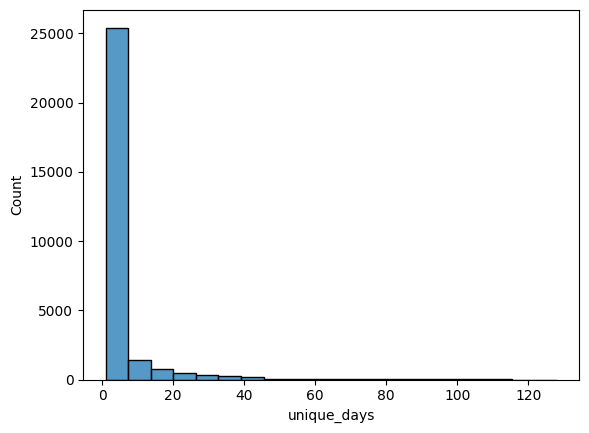

In [ ]:
sns.histplot(data=churners, x='unique_days',bins=20)
plt.show()

In [ ]:
churners['unique_days'].describe()

,unique_days
count,29149.000
mean,4.614
std,10.075
min,1.000
25%,1.000
50%,1.000
75%,3.000
max,128.000


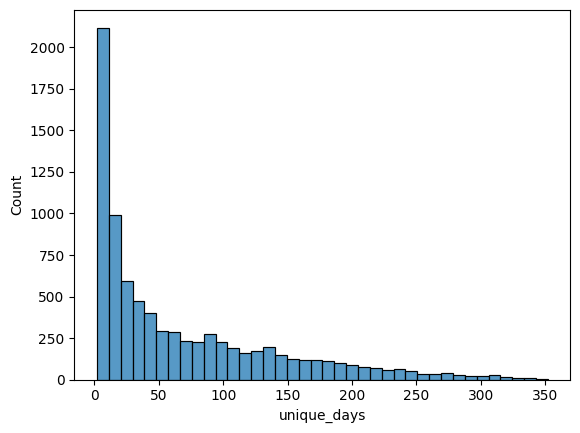

In [ ]:
sns.histplot(data=df[df['Playing_after_6_months']==1], x='unique_days')
plt.show()

In [ ]:
df.loc[df['Playing_after_6_months']==1,'unique_days'].describe()

,unique_days
count,8205.000
mean,67.878
std,73.239
min,2.000
25%,11.000
50%,37.000
75%,105.000
max,352.000


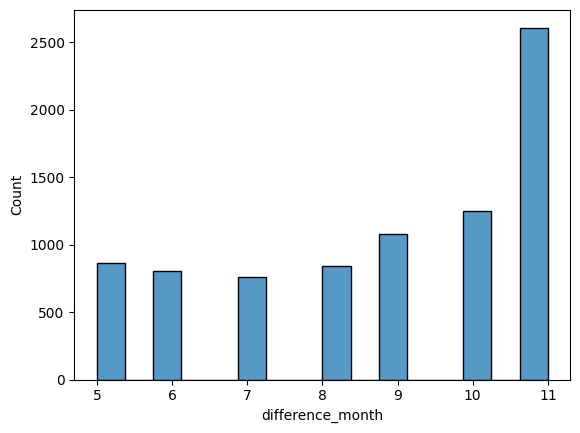

In [ ]:
sns.histplot(data=df[df['Playing_after_6_months']==1], x='difference_month')
plt.show()

In [ ]:
df[df['Playing_after_6_months']==1]['difference_month'].describe()

,difference_month
count,8205.000
mean,8.786
std,2.101
min,5.000
25%,7.000
50%,9.000
75%,11.000
max,11.000


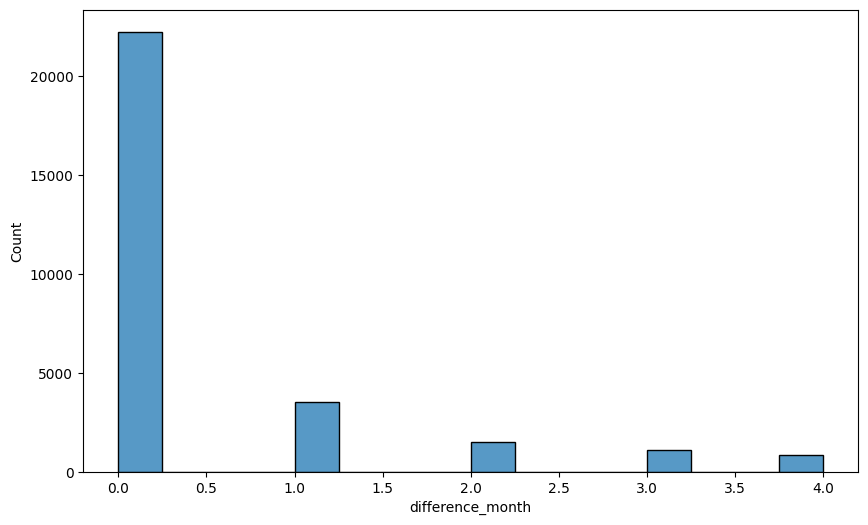

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=churners, x='difference_month')
plt.show()

In [ ]:
churners['difference_month'].describe()

,difference_month
count,29149.000
mean,0.446
std,0.953
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,4.000


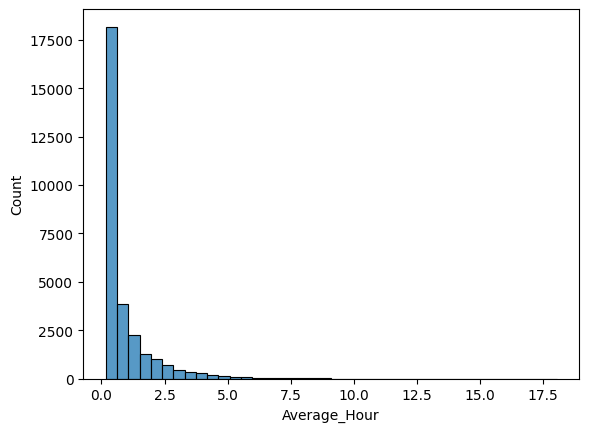

In [ ]:
sns.histplot(data=churners, x='Average_Hour',bins=40)
plt.show()

In [ ]:
churners['Average_Hour'].describe()

,Average_Hour
count,29149.000
mean,0.874
std,1.221
min,0.167
25%,0.167
50%,0.333
75%,1.000
max,18.056


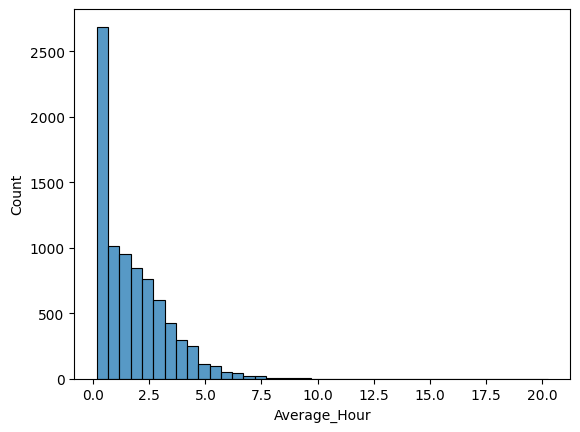

In [ ]:
sns.histplot(data=df[df['Playing_after_6_months']==1], x='Average_Hour',bins=40)
plt.show()

In [ ]:
df.loc[df['Playing_after_6_months']==1,'Average_Hour'].describe()

,Average_Hour
count,8205.000
mean,1.739
std,1.521
min,0.167
25%,0.432
50%,1.372
75%,2.608
max,20.266


Based on the histogram analysis, non-churners spend approximately three times more than churners. This indicates that players who remain engaged with the game tend to invest significantly more in in-game purchases or subscriptions compared to those who eventually leave. This spending behavior suggests that higher engagement levels correlate with a greater willingness to spend, possibly due to factors such as progression incentives, in-game rewards, or social elements like guild participation. Understanding this pattern can help in designing better monetization and retention strategies, such as targeted promotions or personalized offers to encourage continued engagement.

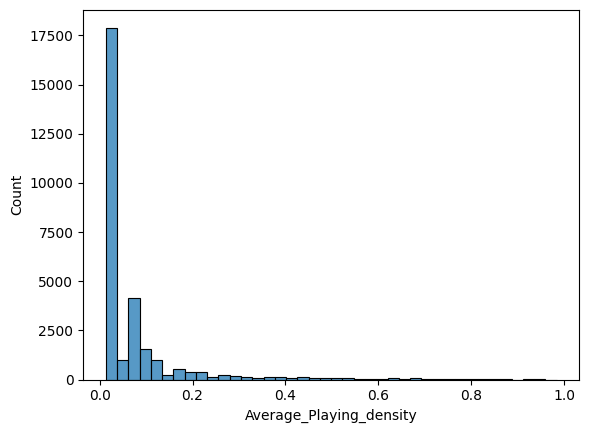

In [ ]:
sns.histplot(data=churners, x='Average_Playing_density',bins=40)
plt.show()

In [ ]:
churners['Average_Playing_density'].describe()

,Average_Playing_density
count,29149.000
mean,0.081
std,0.115
min,0.013
25%,0.033
50%,0.033
75%,0.066
max,0.984


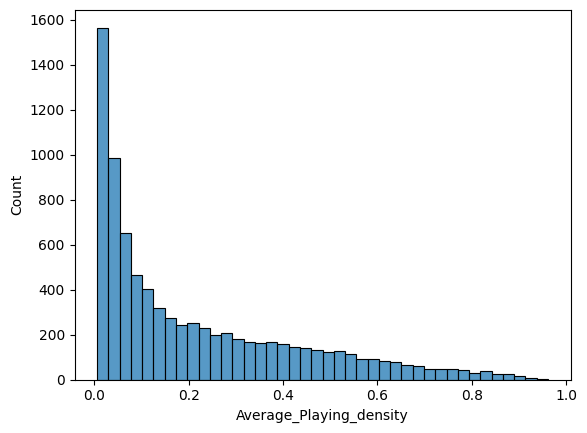

In [ ]:
sns.histplot(data=df[df['Playing_after_6_months']==1], x='Average_Playing_density',bins=40)
plt.show()

In [ ]:
df.loc[df['Playing_after_6_months']==1,'Average_Playing_density'].describe()

,Average_Playing_density
count,8205.000
mean,0.214
std,0.216
min,0.005
25%,0.041
50%,0.127
75%,0.342
max,0.962


# Feature Interactions

Although the correlation analysis reveals a low correlation between timestamps and churn as well as density and churn, I believe there is an underlying causal relationship influencing churn behavior. The histograms indicate that churners tend to have lower density and timestamps compared to non-churners, suggesting that less active players are more likely to leave the game. While the correlation may not be strong, these distributions imply that player activity levels play a role in churn, possibly due to engagement levels, in-game progression, or external factors influencing playtime.

In [8]:
df['density_timestamp'] = df['total_timestamps'] / df['Average_Playing_density']

# Handling Outliers

Rather than using the classical outlier suppression approach, I opted for a binning method to handle outliers. This decision was driven by the observation that churned players and non-churned players exhibit significantly different mean and median values. Given these differences, applying a uniform suppression technique could lead to information loss or distort key patterns in the data. Instead, I implemented a binning approach based on each group's median, mean, and interquartile range (IQR). This method ensures that outliers are managed in a way that respects the inherent distribution of each player category, allowing for more meaningful insights and better model performance.

In [11]:
df.loc[df['total_timestamps'] < 3,'Binned_Timestamps'] = 0
df.loc[(df['total_timestamps'] >= 3) & (df['total_timestamps'] < 28),'Binned_Timestamps'] = 1
df.loc[(df['total_timestamps'] >= 28) & (df['total_timestamps'] < 43),'Binned_Timestamps'] = 2
df.loc[(df['total_timestamps'] >= 43) & (df['total_timestamps'] < 128),'Binned_Timestamps'] = 3
df.loc[(df['total_timestamps'] >= 128),'Binned_Timestamps'] = 3

In [12]:
df.loc[df['max_level'] < 3,'Binned_Level'] = 0
df.loc[(df['max_level'] >= 3) & (df['max_level'] < 14),'Binned_Level'] = 1
df.loc[(df['max_level'] >= 14) & (df['max_level'] < 18),'Binned_Level'] = 2
df.loc[ (df['max_level'] >= 18) & (df['max_level'] < 60) ,'Binned_Level'] = 3
df.loc[ (df['max_level'] >= 60) & (df['max_level'] < 70) ,'Binned_Level'] = 4
df.loc[ (df['max_level'] >= 70) ,'Binned_Level'] = 5

In [13]:
df.loc[df['unique_days'] < 3,'Binned_Unique_Days'] = 0
df.loc[(df['unique_days'] >= 3) & (df['unique_days'] < 11),'Binned_Unique_Days'] = 1
df.loc[(df['unique_days'] >= 11) & (df['unique_days'] < 25),'Binned_Unique_Days'] = 2
df.loc[ (df['unique_days'] >= 25) & (df['unique_days'] < 40),'Binned_Unique_Days'] = 3
df.loc[ (df['unique_days'] >= 40) & (df['unique_days'] < 105),'Binned_Unique_Days'] = 4
df.loc[ (df['unique_days'] >= 105) ,'Binned_Unique_Days'] = 5

In [14]:
df.loc[df['Average_Hour'] < 0.33,'Binned_Average_Hour'] = 0
df.loc[(df['Average_Hour'] >= 0.33) & (df['Average_Hour'] < 0.43),'Binned_Average_Hour'] = 1
df.loc[(df['Average_Hour'] >= 0.43 ) & (df['Average_Hour'] < 1.0),'Binned_Average_Hour'] = 2
df.loc[ (df['Average_Hour'] >= 1) & (df['Average_Hour'] < 2.6) ,'Binned_Average_Hour'] = 3
df.loc[(df['Average_Hour'] >= 2.6) & (df['Average_Hour'] < 6.0) ,'Binned_Average_Hour'] = 4
df.loc[ (df['Average_Hour'] >= 5.0) ,'Binned_Average_Hour'] = 5

In [15]:
df.loc[df['Average_Playing_density'] <0.66,'Binned_Average_Density'] = 0
df.loc[(df['Average_Playing_density'] >= 0.66) & (df['Average_Playing_density'] < 0.127),'Binned_Average_Density'] = 1
df.loc[(df['Average_Playing_density'] >= 0.127) & (df['Average_Playing_density'] < 0.342),'Binned_Average_Density'] = 2
df.loc[ (df['Average_Playing_density'] >= 0.342),'Binned_Average_Density'] = 3

<Axes: >

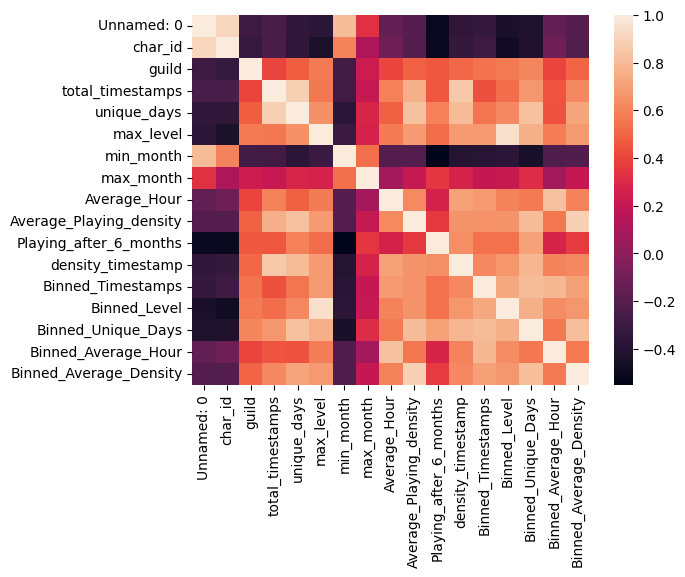

In [16]:
sns.heatmap(df.corr())

After analyzing the correlation between my newly engineered features and the original features, I observed that the new features exhibit a moderate level of correlation with the existing ones. Notably, they do not show either a weak (low) correlation or a strong (high) correlation. This suggests that the newly created features capture additional meaningful patterns in the data without being redundant or overly dependent on the original variables. This balance is crucial, as it ensures that the new features contribute valuable information to the model without introducing excessive multicollinearity.

# Model Building

In this section, I selected models based on well-established classification algorithms that are widely used in machine learning. The chosen models represent a diverse range of approaches, ensuring a comprehensive evaluation of different techniques for churn prediction. By leveraging these well-known algorithms, I aim to compare their performance and identify the most effective model for accurately predicting player churn.

In [19]:
X = df[['density_timestamp','Binned_Timestamps','Binned_Level','Binned_Unique_Days','Binned_Average_Hour','Binned_Average_Density']]
y = df['Playing_after_6_months']

In [20]:
#Importing all the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
#metrikler
from sklearn.model_selection import cross_val_score
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [21]:
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(),
              GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    models=pd.DataFrame({
        'Model':['GaussianNB','BernoulliNB','LogisticRegression','RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier'],
        'Score':results})
    print(models.sort_values(by='Score', ascending=False, ignore_index=True))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [22]:
model_classification(X,y)

Model:  GaussianNB()
Model Accuracy:  0.8442045150352459
Model Confusion Matrix:  [[7780  777]
 [ 969 1681]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.89      0.91      0.90      8557
           1       0.68      0.63      0.66      2650

    accuracy                           0.84     11207
   macro avg       0.79      0.77      0.78     11207
weighted avg       0.84      0.84      0.84     11207

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.7572945480503257
Model Confusion Matrix:  [[6572  543]
 [2177 1915]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.75      0.92      0.83      7115
           1       0.78      0.47      0.58      4092

    accuracy                           0.76     11207
   macro avg       0.77      0.70      0.71     11207
weighted avg       0.76      0.76      0.74     11207

------------

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  LogisticRegression()
Model Accuracy:  0.9400374765771393
Model Confusion Matrix:  [[8516  439]
 [ 233 2019]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.97      0.95      0.96      8955
           1       0.82      0.90      0.86      2252

    accuracy                           0.94     11207
   macro avg       0.90      0.92      0.91     11207
weighted avg       0.94      0.94      0.94     11207

--------------------------------------------------
Model:  RandomForestClassifier()
Model Accuracy:  0.9782278932809851
Model Confusion Matrix:  [[8618  113]
 [ 131 2345]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99      8731
           1       0.95      0.95      0.95      2476

    accuracy                           0.98     11207
   macro avg       0.97      0.97      0.97     11207
weighted avg       0.98      0.98      0.98     

(GradientBoostingClassifier(),
 0.9806371018113679,
 array([[8406,  262],
        [ 343, 2196]]))

Based on the evaluation results, I selected the Gradient Boosting Classifier as the final model. This decision was driven by its superior performance compared to other classification algorithms, demonstrating a strong balance between accuracy, precision, and recall. Gradient Boosting's ability to handle complex patterns and its robustness against overfitting make it a suitable choice for predicting player churn effectively.

# Cross Validation

To ensure that the observed results were not merely due to chance, I incorporated cross-validation into the evaluation process. By applying cross-validation, I aimed to assess the model’s performance across multiple subsets of the data, reducing the risk of overfitting and ensuring that the results were consistent and reliable. This step provided a more robust validation of the Gradient Boosting Classifier's effectiveness in predicting player churn.

In [23]:
from operator import mod
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Average Accuracy:", np.mean(scores))

Average Accuracy: 0.975799096085408


Based on the cross-validation results, I observed a slight variation compared to the previous evaluation. However, this difference is minor and within an acceptable range, confirming the reliability of the model’s performance. Given this consistency, I will proceed with Fine tuning to further optimize the model and enhance its predictive accuracy.

# Fine Tuning

To further enhance the model's performance, I applied GridSearchCV for hyperparameter tuning. This approach systematically searches through a predefined set of parameter values to identify the optimal combination that maximizes the model's predictive accuracy. By leveraging GridSearchCV, I aim to fine-tune the model and improve its generalization ability for better churn prediction.



In [24]:
from sklearn.model_selection import GridSearchCV

# Hiperparameter range
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}


grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameter:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best Parameter: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.9773785509234546


In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4)

model.fit(x_train,y_train)

model_predict=model.predict(x_test)

print("Model Accuracy: ",accuracy_score(model_predict,y_test))






Model Accuracy:  0.9813509413759257


# Saving Model

Since this model can be integrated into real-world applications, I want to ensure that the process is efficient and does not require retraining from scratch each time. To achieve this, I will focus on saving the trained model for future use, allowing for seamless deployment without the need to restart the entire training process. This approach enhances efficiency and ensures that the model can be quickly utilized when needed.

In [26]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Crating Pipeline

To enhance efficiency and reusability, I plan to create a machine learning pipeline using functions. This pipeline will streamline the entire workflow, from data preprocessing to model training and prediction, ensuring that the process can be easily replicated and applied to new data without manual intervention. By structuring the workflow into modular functions, I aim to improve scalability, maintainability, and automation for future applications.

In [30]:
def wow_predict(dataframe):


  #Feature Interactions:

  dataframe['density_timestamp'] = dataframe['total_timestamps'] / dataframe['Average_Playing_density']

  #Handling Outliers

  dataframe.loc[dataframe['total_timestamps'] < 3,'Binned_Timestamps'] = 0
  dataframe.loc[(dataframe['total_timestamps'] >= 3) & (dataframe['total_timestamps'] < 28),'Binned_Timestamps'] = 1
  dataframe.loc[(df['total_timestamps'] >= 28) & (dataframe['total_timestamps'] < 43),'Binned_Timestamps'] = 2
  dataframe.loc[(df['total_timestamps'] >= 43) & (dataframe['total_timestamps'] < 128),'Binned_Timestamps'] = 3
  dataframe.loc[(df['total_timestamps'] >= 128),'Binned_Timestamps'] = 3


  dataframe.loc[dataframe['max_level'] < 3,'Binned_Level'] = 0
  dataframe.loc[(df['max_level'] >= 3) & (dataframe['max_level'] < 14),'Binned_Level'] = 1
  dataframe.loc[(df['max_level'] >= 14) & (dataframe['max_level'] < 18),'Binned_Level'] = 2
  dataframe.loc[ (df['max_level'] >= 18) & (dataframe['max_level'] < 60) ,'Binned_Level'] = 3
  dataframe.loc[ (df['max_level'] >= 60) & (dataframe['max_level'] < 70) ,'Binned_Level'] = 4
  dataframe.loc[ (df['max_level'] >= 70) ,'Binned_Level'] = 5

  dataframe.loc[dataframe['unique_days'] < 3,'Binned_Unique_Days'] = 0
  dataframe.loc[(dataframe['unique_days'] >= 3) & (dataframe['unique_days'] < 11),'Binned_Unique_Days'] = 1
  dataframe.loc[(dataframe['unique_days'] >= 11) & (dataframe['unique_days'] < 25),'Binned_Unique_Days'] = 2
  dataframe.loc[ (df['unique_days'] >= 25) & (dataframe['unique_days'] < 40),'Binned_Unique_Days'] = 3
  dataframe.loc[ (df['unique_days'] >= 40) & (dataframe['unique_days'] < 105),'Binned_Unique_Days'] = 4
  dataframe.loc[ (df['unique_days'] >= 105) ,'Binned_Unique_Days'] = 5


  dataframe.loc[df['Average_Hour'] < 0.33,'Binned_Average_Hour'] = 0
  dataframe.loc[(df['Average_Hour'] >= 0.33) & (dataframe['Average_Hour'] < 0.43),'Binned_Average_Hour'] = 1
  dataframe.loc[(df['Average_Hour'] >= 0.43 ) & (dataframe['Average_Hour'] < 1.0),'Binned_Average_Hour'] = 2
  dataframe.loc[ (df['Average_Hour'] >= 1) & (dataframe['Average_Hour'] < 2.6) ,'Binned_Average_Hour'] = 3
  dataframe.loc[(df['Average_Hour'] >= 2.6) & (dataframe['Average_Hour'] < 6.0) ,'Binned_Average_Hour'] = 4
  dataframe.loc[ (df['Average_Hour'] >= 5.0) ,'Binned_Average_Hour'] = 5


  dataframe.loc[df['Average_Playing_density'] <0.66,'Binned_Average_Density'] = 0
  dataframe.loc[(df['Average_Playing_density'] >= 0.66) & (dataframe['Average_Playing_density'] < 0.127),'Binned_Average_Density'] = 1
  dataframe.loc[(df['Average_Playing_density'] >= 0.127) & (df['Average_Playing_density'] < 0.342),'Binned_Average_Density'] = 2
  dataframe.loc[ (df['Average_Playing_density'] >= 0.342),'Binned_Average_Density'] = 3


# Data Seperation

  X = df[['density_timestamp','Binned_Timestamps','Binned_Level','Binned_Unique_Days','Binned_Average_Hour','Binned_Average_Density']]

  return X


In [31]:
def model_prediction(X,pickle_file):
  #Import necessary libraries
  import pickle
  from sklearn.ensemble import GradientBoostingClassifier

  #Import model
  with open('model.pkl', 'rb') as file:
      model = pickle.load(pickle_file)
  model_predict=model.predict(X)

  return model_predict